In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, plot_confusion_matrix, plot_roc_curve
from sklearn.tree import plot_tree

https://www.kaggle.com/aayushmishra1512/twitchdata

https://www.kaggle.com/girlazo/top-8800-twitch-streamers

In [3]:
df = pd.read_csv('data/twitchdata-update.csv')
df_extended = pd.read_csv('data/TwitchDataSet.csv')
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [5]:
df.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [6]:
df.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

In [7]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


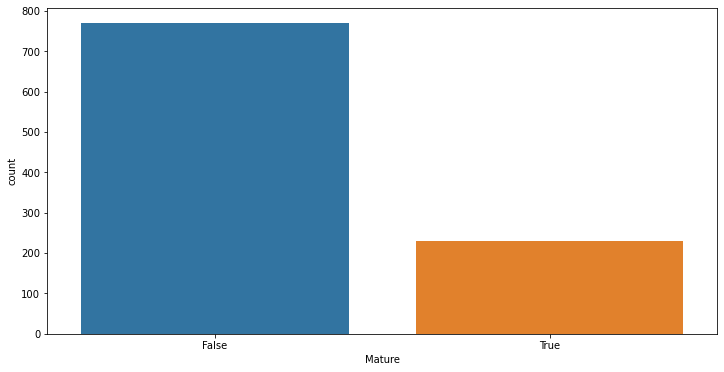

In [8]:
plt.figure(figsize=(12, 6))
plot = sns.countplot(x="Mature", data=df,order=df['Mature'].value_counts().index)

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-p

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29378 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-p

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49660 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-p

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32645 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20625 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 40860 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-p

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\ma

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35987 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 23308 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20820 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50573 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27578 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\ma

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48148 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46965 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20024 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\ma

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 55148 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44404 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 36924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\ma

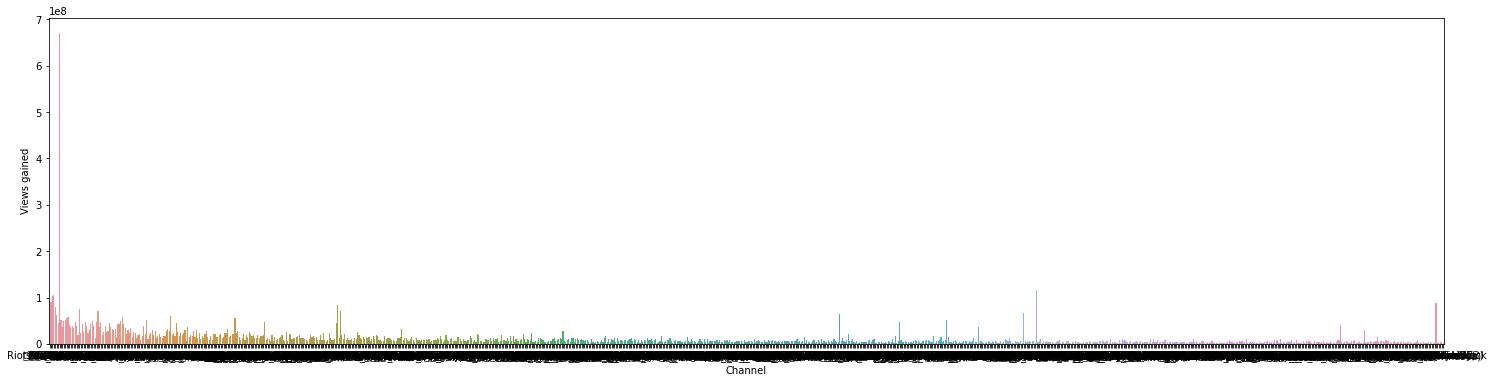

In [9]:
plt.figure(figsize=(25,6))
sns.barplot(x=df[df.Partnered == True]['Channel'], y=df[df.Partnered == True]['Views gained'],order=df[df.Partnered == True]['Channel'])
plt.show()

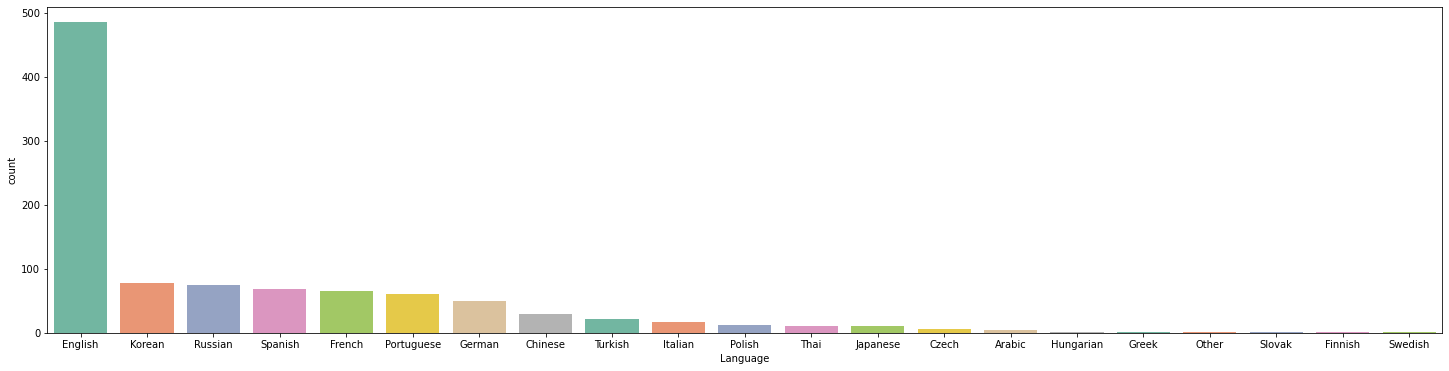

In [10]:
plt.figure(figsize=(25, 6))
plot = sns.countplot(x="Language", data=df,order=df['Language'].value_counts().index, palette="Set2")

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45320 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packa

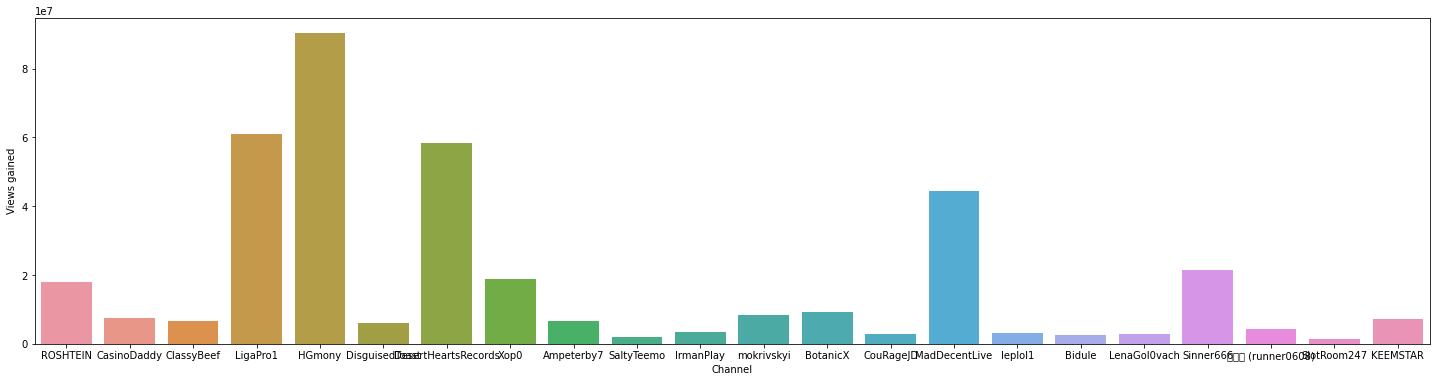

In [11]:
plt.figure(figsize=(25,6))
sns.barplot(x=df[df.Partnered == False]['Channel'] , y=df[df.Partnered == False]['Views gained'],order=df[df.Partnered == False]['Channel'])
plt.show()

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-p

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26775 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-p

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47337 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-p

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48660 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-p

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 33258 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 30001 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52840 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52265 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\ma

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46021 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48148 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\ma

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48660 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53300 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\ma

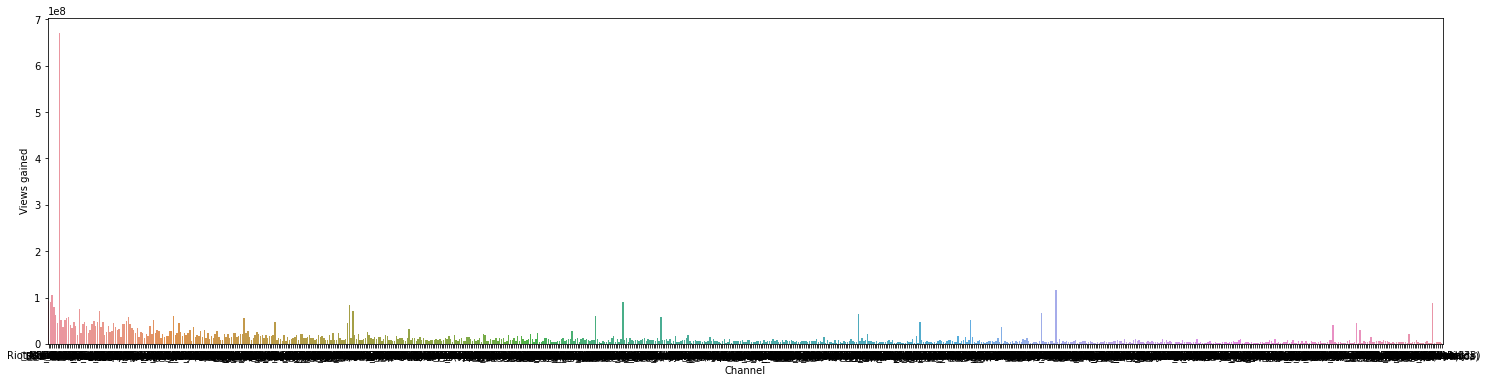

In [12]:
plt.figure(figsize=(25,6))
sns.barplot(x=df[df.Mature == False]['Channel'] , y=df[df.Mature == False]['Views gained'],order=df[df.Mature == False]['Channel'])
plt.show()

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 34662 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24859 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-p

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 36000 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 33655 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22812 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35997 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\ma

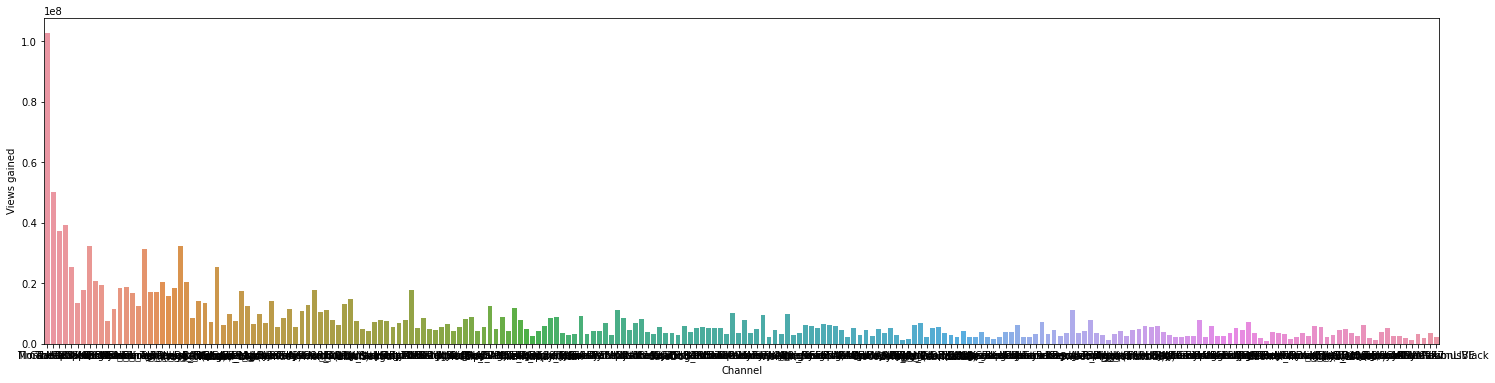

In [13]:
plt.figure(figsize=(25,6))
sns.barplot(x=df[df.Mature == True]['Channel'], y=df[df.Mature == True]['Views gained'],order=df[df.Mature == True]['Channel'])
plt.show()

In [14]:
df_extended.head()

,profile picture,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,partnered,mature,language,completa name,first category,second category,third category
0,https://static-cdn.jtvnw.net/jtv_user_pictures...,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,True,False,English,xQcOW,Just Chatting,Among Us,Overwatch
1,https://static-cdn.jtvnw.net/jtv_user_pictures...,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,True,Portuguese,Gaules,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,https://static-cdn.jtvnw.net/jtv_user_pictures...,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,True,False,English,summit1g,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,https://static-cdn.jtvnw.net/jtv_user_pictures...,4,ESL_CSGO,4764929775,517965,300575,9249,4195657,870484,126008641,True,False,English,ESL_CSGO,Counter-Strike: Global Offensive,NaN,NaN
4,https://static-cdn.jtvnw.net/jtv_user_pictures...,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,True,False,English,NICKMERCS,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection


In [15]:
df_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   profile picture   8800 non-null   object
 1   top count         8800 non-null   int64 
 2   screen name       8800 non-null   object
 3   watch time        8800 non-null   int64 
 4   stream time       8800 non-null   int64 
 5   peak viewers      8800 non-null   int64 
 6   average viewers   8800 non-null   int64 
 7   followers         8800 non-null   int64 
 8   followers gained  8800 non-null   int64 
 9   views gained      8800 non-null   int64 
 10  partnered         8800 non-null   bool  
 11  mature            8800 non-null   bool  
 12  language          8799 non-null   object
 13  completa name     8800 non-null   object
 14  first category    8795 non-null   object
 15  second category   8390 non-null   object
 16  third category    8009 non-null   object
dtypes: bool(2), in

In [16]:
df_extended.isnull().sum()

profile picture       0
top count             0
screen name           0
watch time            0
stream time           0
peak viewers          0
average viewers       0
followers             0
followers gained      0
views gained          0
partnered             0
mature                0
language              1
completa name         0
first category        5
second category     410
third category      791
dtype: int64

In [17]:
df_extended.dtypes

profile picture     object
top count            int64
screen name         object
watch time           int64
stream time          int64
peak viewers         int64
average viewers      int64
followers            int64
followers gained     int64
views gained         int64
partnered             bool
mature                bool
language            object
completa name       object
first category      object
second category     object
third category      object
dtype: object

## Data Cleaning

Merging the data sets together and drop duplicates

In [133]:
df_extended.rename(columns={'screen name':'Channel', 'watch time': 'Watch time(Minutes)', 'stream time': 'Stream time(minutes)', 'peak viewers': 'Peak viewers', 'average viewers': 'Average viewers', 'followers': 'Followers', 'followers gained': 'Followers gained', 'views gained': 'Views gained', 'partnered': 'Partnered', 'mature': 'Mature', 'language': 'Language'}, inplace = True)

In [134]:
df_extended.head()

,profile picture,top count,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,completa name,first category,second category,third category
0,https://static-cdn.jtvnw.net/jtv_user_pictures...,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,True,False,English,xQcOW,Just Chatting,Among Us,Overwatch
1,https://static-cdn.jtvnw.net/jtv_user_pictures...,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,True,Portuguese,Gaules,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,https://static-cdn.jtvnw.net/jtv_user_pictures...,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,True,False,English,summit1g,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,https://static-cdn.jtvnw.net/jtv_user_pictures...,4,ESL_CSGO,4764929775,517965,300575,9249,4195657,870484,126008641,True,False,English,ESL_CSGO,Counter-Strike: Global Offensive,NaN,NaN
4,https://static-cdn.jtvnw.net/jtv_user_pictures...,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,True,False,English,NICKMERCS,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection


In [216]:
#Merging Datasets on the Crash_Record_ID Column
df_merge = pd.merge(df, df_extended, on=['Channel',
                                        'Partnered','Mature', 'Language']).reset_index()

#dropping duplicates(checks Channel for uniqueness)
df_dropped= df_merge.drop_duplicates(subset=['Channel'], keep='first')

In [217]:
df_dropped.head()

,index,Channel,Watch time(Minutes)_x,Stream time(minutes)_x,Peak viewers_x,Average viewers_x,Followers_x,Followers gained_x,Views gained_x,Partnered,...,Stream time(minutes)_y,Peak viewers_y,Average viewers_y,Followers_y,Followers gained_y,Views gained_y,completa name,first category,second category,third category
0,0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,...,215670,222720,32913,3691010,2051895,109735389,xQcOW,Just Chatting,Among Us,Overwatch
1,1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,...,216000,310998,25931,5374710,1402547,91501875,summit1g,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
2,2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,...,515595,387315,12254,1966465,1141123,112807468,Gaules,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
3,3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,...,517965,300575,9249,4195657,870484,126008641,ESL_CSGO,Counter-Strike: Global Offensive,NaN,NaN
4,4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,...,130680,190173,25269,9184421,2023733,70427346,Tfue,Fortnite,Call Of Duty: Modern Warfare,Among Us


Anything denoted by an x is old data, anything by y is more recent

In [218]:
df.size

11000

In [219]:
#df_dropped.hist(figsize=(20,20), bins='auto');

In [220]:
df_dropped.isnull().sum()

index                      0
Channel                    0
Watch time(Minutes)_x      0
Stream time(minutes)_x     0
Peak viewers_x             0
Average viewers_x          0
Followers_x                0
Followers gained_x         0
Views gained_x             0
Partnered                  0
Mature                     0
Language                   0
profile picture            0
top count                  0
Watch time(Minutes)_y      0
Stream time(minutes)_y     0
Peak viewers_y             0
Average viewers_y          0
Followers_y                0
Followers gained_y         0
Views gained_y             0
completa name              0
first category             0
second category           50
third category            80
dtype: int64

In [221]:
df_dropped = df_dropped.drop(['first category','second category','third category','completa name', 'Channel', 'Language', 'profile picture', 'index'],axis=1)
#df_dropped = df_dropped.drop('third category',axis=1)

Most livestreamers hardly ever stream a second or third category and if they do it takes up a miniscule percentage of their total stream time

In [222]:
df_dropped.isnull().sum()

Watch time(Minutes)_x     0
Stream time(minutes)_x    0
Peak viewers_x            0
Average viewers_x         0
Followers_x               0
Followers gained_x        0
Views gained_x            0
Partnered                 0
Mature                    0
top count                 0
Watch time(Minutes)_y     0
Stream time(minutes)_y    0
Peak viewers_y            0
Average viewers_y         0
Followers_y               0
Followers gained_y        0
Views gained_y            0
dtype: int64

## Trying to make a column that keeps track of whether or not there was increased growth between previous years

Anything denoted by an x is old data, anything by y is more recent

In [223]:
old_growth = []
for index in df_dropped['Average viewers_x']:
    old_growth.append(index)

In [224]:
new_growth = []
for index in df_dropped['Average viewers_y']:
    new_growth.append(index)


In [225]:
positive_growth = []
for x in range(len(new_growth)):
    if new_growth[x] > old_growth[x]:
        positive_growth.append(True)
    else:
        positive_growth.append(False)

In [226]:
df_dropped.insert(2,'Increased_Growth', positive_growth)
df_dropped.head()

,Watch time(Minutes)_x,Stream time(minutes)_x,Increased_Growth,Peak viewers_x,Average viewers_x,Followers_x,Followers gained_x,Views gained_x,Partnered,Mature,top count,Watch time(Minutes)_y,Stream time(minutes)_y,Peak viewers_y,Average viewers_y,Followers_y,Followers gained_y,Views gained_y
0,6196161750,215250,True,222720,27716,3246298,1734810,93036735,True,False,1,7333609065,215670,222720,32913,3691010,2051895,109735389
1,6091677300,211845,True,310998,25610,5310163,1370184,89705964,True,False,3,6235007490,216000,310998,25931,5374710,1402547,91501875
2,5644590915,515280,True,387315,10976,1767635,1023779,102611607,True,True,2,6314532585,515595,387315,12254,1966465,1141123,112807468
3,3970318140,517740,True,300575,7714,3944850,703986,106546942,True,False,4,4764929775,517965,300575,9249,4195657,870484,126008641
4,3671000070,123660,False,285644,29602,8938903,2068424,78998587,True,False,9,3276339360,130680,190173,25269,9184421,2023733,70427346


## Data Preperation

Store the features in a variable names 'X' and the target variable in 'y'.

In [227]:
X = df_dropped.drop(['Increased_Growth','Average viewers_x', 'Average viewers_y'],axis=1)
y = df_dropped.Increased_Growth

In [228]:
X

,Watch time(Minutes)_x,Stream time(minutes)_x,Peak viewers_x,Followers_x,Followers gained_x,Views gained_x,Partnered,Mature,top count,Watch time(Minutes)_y,Stream time(minutes)_y,Peak viewers_y,Followers_y,Followers gained_y,Views gained_y
0,6196161750,215250,222720,3246298,1734810,93036735,True,False,1,7333609065,215670,222720,3691010,2051895,109735389
1,6091677300,211845,310998,5310163,1370184,89705964,True,False,3,6235007490,216000,310998,5374710,1402547,91501875
2,5644590915,515280,387315,1767635,1023779,102611607,True,True,2,6314532585,515595,387315,1966465,1141123,112807468
3,3970318140,517740,300575,3944850,703986,106546942,True,False,4,4764929775,517965,300575,4195657,870484,126008641
4,3671000070,123660,285644,8938903,2068424,78998587,True,False,9,3276339360,130680,190173,9184421,2023733,70427346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,122628630,103020,14566,48007,8995,87603521,True,False,1171,112819800,114090,14566,48735,8146,85061422
952,122524635,13560,21359,601927,562691,2162107,True,False,559,233955885,28215,21359,815833,797857,4145737
953,122523705,153000,3940,213212,52289,4399897,True,False,1029,127993785,150495,4460,228210,56879,4851825
954,122452320,217410,6431,109068,-4942,3417970,True,False,1179,111773565,224880,6431,106932,-7826,3213147


## Train-Test Split

Split the data into training and testing sets.

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### One Hot Encoding

Create binary columns for all values in categorical columns.

In [230]:
#Ohe-ing Train set
X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(drop='first',sparse=False)

dums_train = ohe.fit_transform(X_train_cat)
dums_train_df = pd.DataFrame(dums_train,
                       columns=ohe.get_feature_names(),
                       index=X_train_cat.index)

nums_train_df = X_train.select_dtypes(['int64','float64'])

X_train_clean = pd.concat([nums_train_df, dums_train_df], axis=1)

In [231]:
#Ohe-ing Test set
X_test_cat = X_test.select_dtypes('object')

dums_test = ohe.transform(X_test_cat)
dums_test_df = pd.DataFrame(dums_test,
                       columns=ohe.get_feature_names(),
                       index=X_test_cat.index)

nums_test_df = X_test.select_dtypes(['int64','float64'])

X_test_clean = pd.concat([nums_test_df, dums_test_df], axis=1)

## Modeling

### Dummy Classifier

Baseline model for comparison

In [232]:
dummy = DummyClassifier(random_state=42) 

#establishing random_state for reproducibility
dummy.fit(X_train_clean, y_train)
y_pred = dummy.predict(X_test_clean)

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


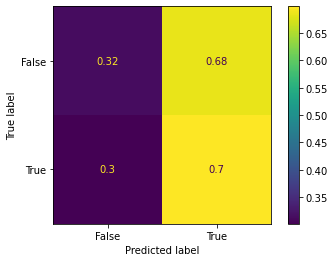

In [233]:
plot_confusion_matrix(estimator=dummy, X=X_test_clean, y_true=y_test, normalize='true');

In [234]:
y_train.value_counts(normalize=True)

True     0.670851
False    0.329149
Name: Increased_Growth, dtype: float64

In [235]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.5815899581589958


## Decision Tree

In [236]:
tree = DecisionTreeClassifier()

In [237]:
tree_grid = {'max_leaf_nodes': [4, 5, 6, 7], 
             'min_samples_split': [2, 3, 4],
             'max_depth': [2, 3, 4, 5],
            }

In [238]:
tree_grid_search = GridSearchCV(tree, tree_grid, cv=5)

In [239]:
tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4]})

In [240]:
tree_grid_search.best_params_

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}

In [241]:
tree_grid_search.best_score_

0.6917249417249417

In [242]:
tree_grid_search.best_estimator_.score(X_test, y_test)

0.6820083682008368

In [243]:
best_tree = tree_grid_search.best_estimator_

In [244]:
tree_test_preds = best_tree.predict(X_test)

[Text(167.4, 181.2, 'X[13] <= 43604.0\ngini = 0.442\nsamples = 717\nvalue = [236, 481]'),
 Text(83.7, 108.72, 'X[4] <= 40694.5\ngini = 0.499\nsamples = 192\nvalue = [100, 92]'),
 Text(41.85, 36.23999999999998, 'gini = 0.494\nsamples = 160\nvalue = [71, 89]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.17\nsamples = 32\nvalue = [29, 3]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 30555.0\ngini = 0.384\nsamples = 525\nvalue = [136, 389]'),
 Text(209.25, 36.23999999999998, 'gini = 0.494\nsamples = 38\nvalue = [21, 17]'),
 Text(292.95, 36.23999999999998, 'gini = 0.361\nsamples = 487\nvalue = [115, 372]')]

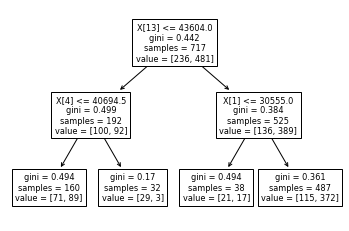

In [245]:
#creating a visualization of the decision tree
plot_tree(best_tree)

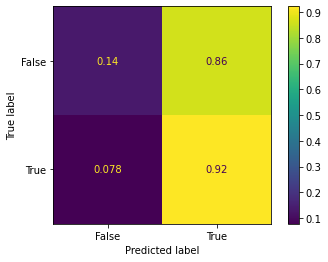

In [246]:
plot_confusion_matrix(best_tree, X_test, y_test, normalize='true')

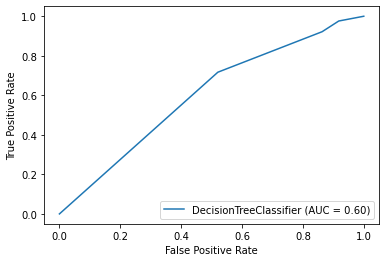

In [247]:
plot_roc_curve(best_tree, X_test, y_test)

In [248]:
#prints all relevant metrics of a model, this will be reused so we're defining it here
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [249]:
print_metrics(y_test, tree_test_preds)

Precision Score: 0.7083333333333334
Recall Score: 0.9216867469879518
Accuracy Score: 0.6820083682008368
F1 Score: 0.8010471204188482


In [250]:
tree_features = list(zip(best_tree.feature_importances_, X_train.columns.values))
tree_features = sorted(tree_features, key=lambda x: x[0], reverse=True)
tree_features_values = [x[0] for x in tree_features][:4]
tree_features_names = [x[1] for x in tree_features][:4]
tree_features_names

['Followers gained_y',
 'Followers gained_x',
 'Stream time(minutes)_x',
 'Watch time(Minutes)_x']

Text(0, 0.5, 'Feature')

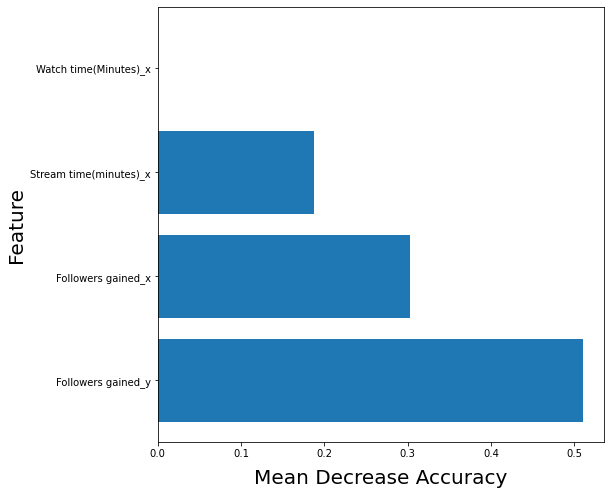

In [251]:
plt.figure(figsize=(8,8))
tree_labels = ['Followers gained_y',
 'Followers gained_x',
 'Stream time(minutes)_x',
 'Watch time(Minutes)_x']
plt.barh(tree_features_names, tree_features_values, align='center', tick_label=tree_labels)
plt.xlabel('Mean Decrease Accuracy', fontsize=20, labelpad=10)
plt.ylabel('Feature', fontsize=20)

In [252]:
tree_cv_df = pd.DataFrame(tree_grid_search.cv_results_)
tree_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002869,0.000213,0.001536,0.000030,2,4,2,"{'max_depth': 2, 'max_leaf_nodes': 4, 'min_sam...",0.708333,0.708333,0.657343,0.692308,0.692308,0.691725,0.018625,1
1,0.002940,0.000204,0.001318,0.000247,2,4,3,"{'max_depth': 2, 'max_leaf_nodes': 4, 'min_sam...",0.708333,0.708333,0.657343,0.692308,0.692308,0.691725,0.018625,1
2,0.002836,0.000245,0.001215,0.000249,2,4,4,"{'max_depth': 2, 'max_leaf_nodes': 4, 'min_sam...",0.708333,0.708333,0.657343,0.692308,0.692308,0.691725,0.018625,1
3,0.002736,0.000247,0.001315,0.000248,2,5,2,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.708333,0.708333,0.657343,0.692308,0.692308,0.691725,0.018625,1
4,0.002941,0.000201,0.001216,0.000248,2,5,3,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.708333,0.708333,0.657343,0.692308,0.692308,0.691725,0.018625,1
